## 0 Questions

### Q1:  can Python be used for open search keywords in collected documents for capturing the meaning of self-identified terms such as “participation”, “engagement”, “deliberation” etc.? Is the bag of words approach and/or TF-IDF suitable for performing this kind of tasks? 

In [ ]:
# opening a text file and search if the keyword exists

with open('C:/Users/kimuj/Documents/Python Scripts/Training/data/Data1.txt') as f:
    if 'citizen' in f.read():
        print("true")
    else:
        print ('False')

#### keyword-in-context (KWIC) analysis

It produces a list of text fragments of equal length showing the left and right context of a keyword.

KWIC analysis is implemented in NLTK and textacy. We will use textacy’s KWIC function because it is fast and works on the untokenized text. Thus, we can search for strings spanning multiple tokens like “climate change,” while NLTK cannot. Both NLTK and textacy’s KWIC functions work on a single document only. 

In [118]:
from textacy.text_utils import KWIC # key-words-in-context

def kwic(doc_series, keyword, window=35, print_samples=5):

    # The function iteratively collects the keyword contexts by applying the add_kwic function to each document with map. 
    # By default, the function returns a list of tuples of the form (left context, keyword, right context). 
    
    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True,
                              window_width=window, print_only=False))

    kwic_list = []
    doc_series.map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))

ModuleNotFoundError: No module named 'click._bashcomplete'

In [86]:
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

NameError: name 'kwic' is not defined

### Q2: can Python be used for mapping the frequency distribution of the words identified from the results from Q1 by topic, time, and/or location/district? 

A dataset consisting of text documents such as news, tweets, emails, or service calls is called a corpus in natural language processing. The statistical exploration of such a corpus has different facets. Some analyses focus on metadata attributes, while others deal with the textual content.

This figure shows typical attributes of a text corpus, some of which are included in the data source, while others could be calculated or derived. The document metadata comprise multiple descriptive attributes, which are useful for aggregation and filtering. Time-like attributes are essential to understanding the evolution of the corpus. If available, author-related attributes allow you to analyze groups of authors and to benchmark these groups against one another.

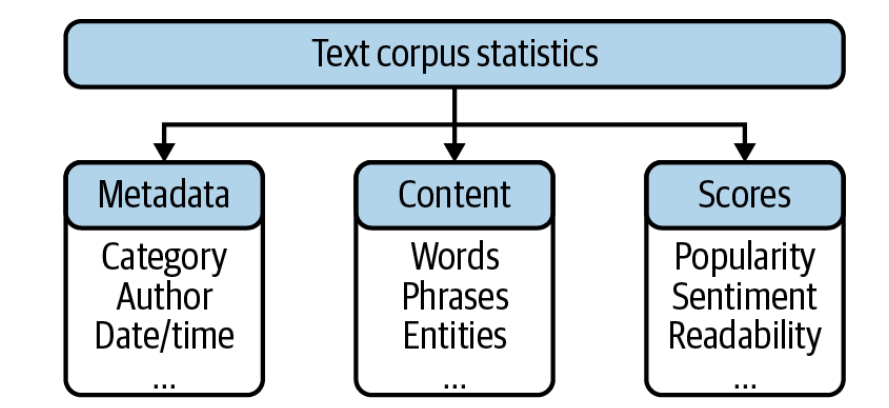

### Comparing frequencies across time and categories

You surely know Google Trends, where you can track the development of a number of search terms over time. This kind of trend analysis computes frequencies by day and visualizes them with a line chart. We want to track the development of certain keywords over the course of the years in our UN Debates dataset to get an idea about the growing or shrinking importance of topics such as climate change, terrorism, or migration.

### Creating frequency timeline

Our approach is to calculate the frequencies of given keywords per document and then aggregate those frequencies using Pandas’s groupby function. The following function is for the first task. It extracts the counts of given keywords from a list of tokens:

#### Prepare data

In [80]:
# An example dataset
import pandas as pd 

file = "C:/Users/kimuj/Documents/Python Scripts/Training/data/un-general-debates-blueprint.csv.gz"
df = pd.read_csv(file)
df.sample(2)

,session,year,country,country_name,speaker,position,text
6596,66,2011,FJI,Fiji,Josaia V. Bainimarama,Prime Minister,I bring warm greetings \nto all from the Gover...
5261,59,2004,FRA,France,Mr. Michel Barnier,Minister for Foreign Affairs,"I would\nlike to congratulate you, Mr. Preside..."


#### Preprosessing

We want to create a new column called tokens containing the lowercased, tokenized text without stop words for each document. For that, we use an extensible pattern for a processing pipeline. In our case, we will change all text to lowercase, tokenize it, and remove stop words. Other operations can be added by simply extending the pipeline:

In [101]:
'''
Regular expressions 
matches tokens consisting of at least one letter (\p{L}), 
preceded and followed by an arbitrary sequence of 
alphanumeric characters (\w includes digits, letters, and underscore) and hyphens (-):

'''

import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

# remove stopwords

import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Processing a Pipeline with One Line of Code

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [102]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [105]:
df

,session,year,country,country_name,speaker,position,text,tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,"[may, first, convey, president, congratulation..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,"[fortunate, coincidence, precisely, time, unit..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,"[pleasure, extend, mr, president, warmest, con..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,"[may, begin, expressing, ambassador, hambro, b..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...","[doubt, us, coming, rostrum, wonders, usefulne..."
...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,"[behalf, people, government, yemen, would, lik..."
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,"[seventy, years, passed, since, establishment,..."
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,"[like, congratulate, president, country, denma..."
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,"[would, like, begin, thanking, secretary-gener..."


Our approach is to calculate the frequencies of given keywords per document and then aggregate those frequencies using Pandas’s groupby function. The following function is for the first task. It extracts the counts of given keywords from a list of tokens:

In [106]:
# Python’s standard library has a built-in class Counter, which does exactly what you might think: it counts things

from collections import Counter

def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

Test the functionality

In [98]:
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
tokens = ['nuclear', 'climate', 'climate', 'freedom', 'climate', 'freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


As you can see, the function returns a list or vector of word counts. In fact, it’s a **very simple count-vectorizer for keywords**. If we apply this function to each document in our DataFrame, we get a matrix of counts. The blueprint function count_keywords_by, shown next, does exactly this as a first step. The matrix is then again converted into a DataFrame that is finally aggregated and sorted by the supplied grouping column.

In [114]:
import numpy as np
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook` [ipykernel_launcher.py:3]


**tqdm** (pronounced taqadum for “progress” in Arabic) is a great library for progress bars in Python. It supports conventional loops, e.g., by using tqdm_range instead of range, and it supports Pandas by providing progress_map and progress_apply operations on dataframes.

In [115]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].progress_apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

In [116]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

The resulting DataFrame is already perfectly prepared for plotting as we have one data series per keyword. Using Pandas’s plot function, we get a nice line chart similar to Google Trends

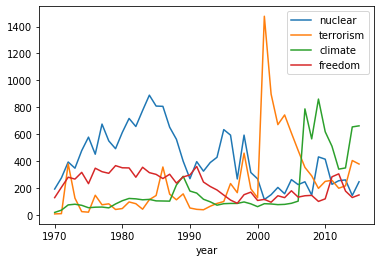

In [117]:
freq_df.plot(kind='line')

Note the peak of nuclear in the 1980s indicating the arms race and the high peak of terrorism in 2001. It is somehow remarkable that the topic climate already got some attention in the 1970s and 1980s.

Even though we use only the attribute year as a grouping criterion in our examples, the blueprint function allows you to compare word frequencies across any discrete attribute, e.g., country, category, author—you name it. In fact, you could even specify a list of grouping attributes to compute, for example, counts per country and year.

### Q3: after having constructed a set of keywords on a specific problem in public space management, can Python be used for identifying other related aspects for telling a story of public space management, such as actors, actions, locations, causes, and outcomes, etc.? (asked by Charaine) 

### Named entity recognition

A named entity is basically a real-life object which has proper identification and can be denoted with a proper name. Named Entities can be a place, person, organization, time, object, or geographic entity.

An example:

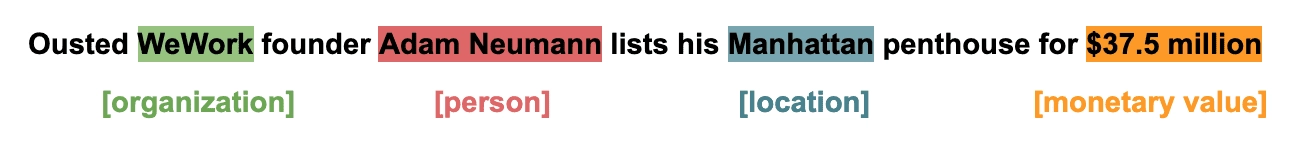

In [7]:
import spacy
from spacy import displacy

NER = spacy.load('en_core_web_sm')

AttributeError: module 'spacy' has no attribute 'load'

In [ ]:
raw_text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."

In [ ]:
text1= NER(raw_text)

# Now, we print the data on the NEs found in this text sample.
for word in text1.ents:
    print(word.text,word.label_)

### Q4: is it possible to use Python to establish causal linkages that are explicitly or implicitly stated in texts?  

**Ans:**

Developments in NLP like topic models and contextual word embeddings, make it possible to utilize text to answer causal questions. 

The challenge is in developing new assumptions that will ensure that the use of NLP methods will lead to valid causal inferences.

There are several domains where it is possible to use text variables to estimate causal effects, and within some domains new research fields have emerged. 

For instance, Algaba et al. (2020) use econometric methodology to transform qualitative sentiment data into quantitative **sentiment variables**, and then use these NLP-derived text variables in econometric analysis. They refer to this emerging field as sentometrics, which is a portmanteau of sentiment and econometrics. (https://onlinelibrary.wiley.com/doi/10.1111/joes.12370)

Researchers have also made good use of the vast amount of open source text data made available by social media platforms like **Twitter**. Tan et al. (2014) looked at the effect of wording on message propagation, where they controlled for confounding by looking at tweets that contained the same url and were written by the same user, but employed different wording.

Wang & Culotta (2019) look at the impact of lexical choice on audience perception; for instance, how users describe themselves in their social media profile can have an effect on their perceived socio-economic status.(https://ojs.aaai.org//index.php/AAAI/article/view/4708)

More resources are available on https://github.com/jvpoulos/causal-ml

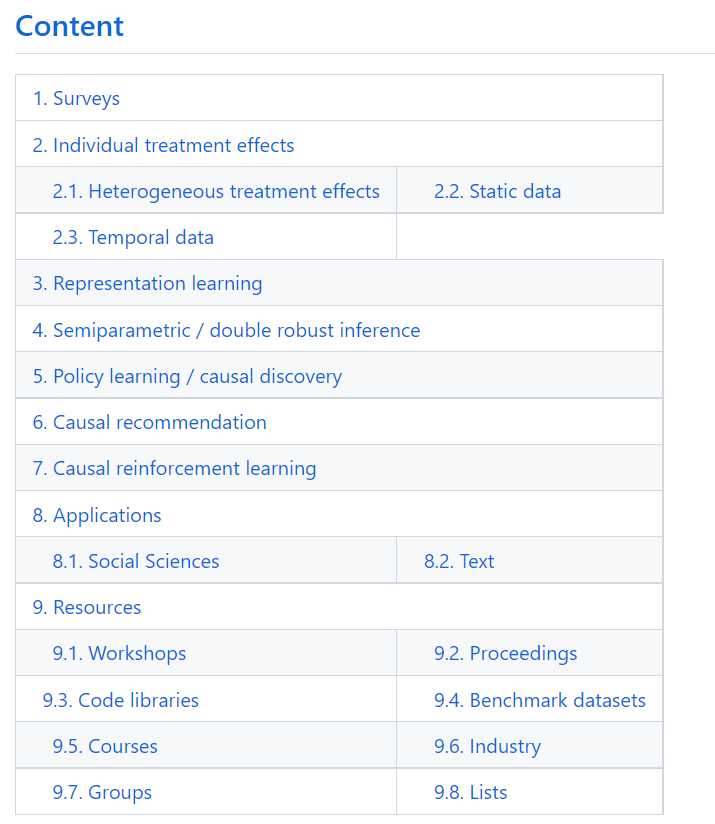

#### An example by Pryzant et al. (2021) 

(https://arxiv.org/abs/2010.12919)

A writer uses linguistic property T and other properties Z, which may be correlated (denoted by bidirected arrow), to write the text W

From the text, the reader perceives the property of interest, captured by T˜,
and together with other perceived information Z˜, produces the outcome Y . The proxy label of the property
obtained via a classifier or lexicon is captured by Tˆ.

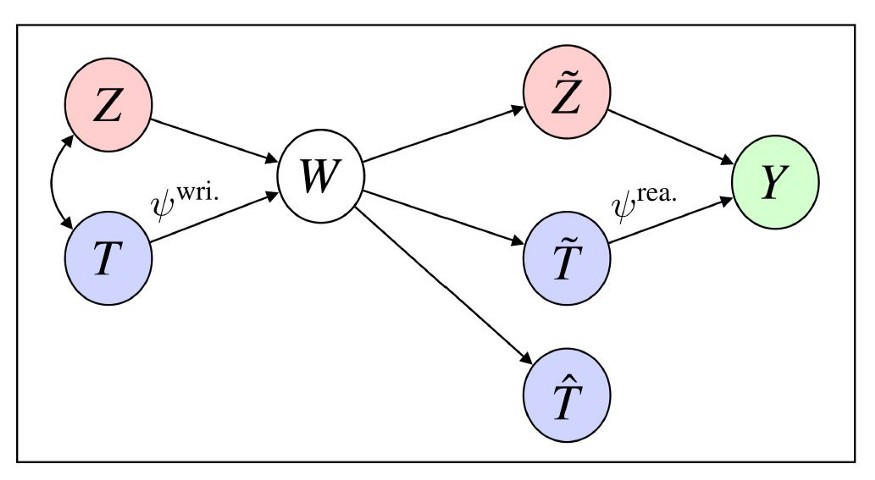

More detailed explanation: 

The text is represented by W, which has the linguistic property T (as treatment), and other qualities Z (as covariates). 

Here, Z could be the topic, sentiment, length or other qualities of a text. This causal model is built with the literary argument that language is subject to two perspectives: the text as intended by the author and the text as interpreted by the reader. 

The second perspective of the reader is shown by T_tilde and Z_tilde — where T_tilde represents the treatment as received by the reader, and Z_tilde represents the other qualities of the text W as perceived by the reader. 

The outcome Y is affected by the tilde variables instead of Z and T directly. 

The T_hat variable represents the proxy label as derived from the text W, which could be topic labels.

#### An example

The first step is to install the needed packages in Colab. This is done with the following single line of code:

In [ ]:
!pip install sklearn transformers tensorflow

In [ ]:
# Next, we check to see if the GPU is available.

import torch
if torch.cuda.is_available():
   device = torch.device("cuda")
   print('There are %d GPU(s) available.' %       torch.cuda.device_count())
   print('We will use the GPU:', torch.cuda.get_device_name(0))
   !nvidia-smi
else:
   print('No GPU available, using the CPU instead.')
   device = torch.device("cpu")

In [ ]:
# Then we navigate to the folder where the data is saved.

%cd gdrive/My Drive/my_folder

In [ ]:
# Next we clone the adapted repo for the causal-text algorithm from GitHub.

!git clone https://github.com/haayanau/causal-text.git

In [ ]:
# After the causal-text package has been cloned, it is necessary to navigate to the directory where the main script is located.

%cd causal-text/src

In [ ]:
'''
Running the algorithm is very simple, run the following command with the path leading to the “.tsv” file. 
The “run_cb” argument means that CausalBERT will be used to adjust for the text. The models are trained for 3 epochs each.

'''

!python main.py --run_cb --data /content/gdrive/MyDrive/my_folder/my_data.tsv

### Other notes for large-scale data projects

For larger projects, we recommend setting up a search engine like Apache SOLR, Elasticsearch, or Tantivy. Those platforms create specialized indexes (also using TF-IDF weighting) for fast full-text search. Python APIs are available for all of them.

When processing larger datasets, it is recommended to use spaCy’s batch processing for a significant performance gain (roughly factor 2 on our dataset). The function nlp.pipe takes an iterable of texts, processes them internally as a batch, and yields a list of processed Doc objects in the same order as the input data.

# Contents in this session

+ **Reading documents and importing data**

</br>

+ **Basic web scraping skills**

</br>

+ **Text classification**

# 1 Reading documents

### Let’s have a look at the “ordinary” way of reading multiple text files using the open() function. 

### PDF

PDF stands for Portable Document Format and uses the .pdf file extension. 

The module you’ll use to work with PDFs is **PyPDF2**

PyPDF2 does not have a way to extract images, charts, or other media from 
PDF documents, but it can extract text and return it as a Python string. 

Functions of PyPDF2:

+ Extracting document information.
+ Splitting documents page by page
+ Merging documents page by page
+ Cropping pages
+ Merging multiple pages into a single page
+ Encrypting and decrypting PDF files

#### Installation

To install this package type the below command in the terminal:

pip install PyPDF2 or conda install -c conda-forge package

In [1]:
# importing required modules 
import PyPDF2 

In [2]:
# openthe example.pdf in binary mode
pdfFileObj = open('C:/Users/kimuj/Documents/Python Scripts/Training/data/test.pdf', 'rb') 

# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [3]:
# printing number of pages in pdf file 
print(pdfReader.numPages) 

14


In [4]:
# creating a page object 
'''
To extract text from a page, you need to get a Page object, which represents a single page of a PDF, 
from a PdfFileReader object. You can get a Page object by calling the getPage() method  
on a PdfFileReader object and passing it the page number of the page you’re interested in—in our case, 0.

'''
pageObj = pdfReader.getPage(0) 

In [5]:
# Once you have your Page object, call its extractText() method to return a string of the page’s text

'''
Note: the official documentation says this on the method: 
“This works well for some PDF files, but poorly for others, depending on the generator used.”

'''

pageObj.extractText()

'936.\n Facilitating innovation for smart cities: \nthe role of public policies in the case of JapanMasaru YarimeINTRODUCTIONThe eleventh goal of the United Nations Sustainable Development Goals \n(SDGs) is aimed at developing cities that are inclusive, safe, resilient and \nsustainable (United Nations 2015). In our efforts to achieve urban sustain\n-ability, smart cities are expected to play a critical role (Bibri & Krogstie \n2017). Currently, many urban functions, including energy, transportation, \nand buildings, are currently undergoing a significant transformation follow\n-ing the advent of smart devices and equipment (Curley 2016). In the power \nsector, for example, a smart grid system can lower costs, integrate renewable \nenergies, and balance loads, which contributes to improving energy efficiency \nand reducing carbon dioxide (CO\n2) emissions. In the transportation sector, \na dynamic congestion-charging system can adjust traffic flows and offer incen\n-tives to use park-a

In [6]:
# closing the pdf file object 
pdfFileObj.close()

#### Merging PDF files

In [ ]:
from PyPDF2 import PdfFileMerger

pdfs = ['file1.pdf', 'file2.pdf', 'file3.pdf', 'file4.pdf']

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("result.pdf")
merger.close()

In [ ]:
# importing required modules
import PyPDF2
 
 
def PDFmerge(pdfs, output):
    # creating pdf file merger object
    pdfMerger = PyPDF2.PdfFileMerger()
 
    # appending pdfs one by one
    for pdf in pdfs:
        pdfmerger.append(pdf)
 
    # writing combined pdf to output pdf file
    with open(output, 'wb') as f:
        pdfMerger.write(f)
 
 
def main():
    # pdf files to merge
    pdfs = ['example.pdf', 'rotated_example.pdf']
 
    # output pdf file name
    output = 'combined_example.pdf'
 
    # calling pdf merge function
    PDFmerge(pdfs=pdfs, output=output)
 
 
if __name__ == "__main__":
    # calling the main function
    main()

#### Another module: pdfminer.six

Example codes from official websites:

In [7]:
# Read and write string in memory
from io import StringIO


from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

output_string = StringIO()

with open('C:/Users/kimuj/Documents/Python Scripts/Training/data/test.pdf', 'rb') as in_file:
    parser = PDFParser(in_file)
    doc = PDFDocument(parser)
    rsrcmgr = PDFResourceManager()
    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    for page in PDFPage.create_pages(doc):
        interpreter.process_page(page)

print(output_string.getvalue())

6.  Facilitating innovation for smart cities: 

the role of public policies in the case 
of Japan
Masaru Yarime

INTRODUCTION

The  eleventh  goal  of  the  United  Nations  Sustainable  Development  Goals 
(SDGs)  is  aimed  at  developing  cities  that  are  inclusive,  safe,  resilient  and 
sustainable  (United  Nations  2015).  In  our  efforts  to  achieve  urban  sustain-
ability,  smart  cities  are  expected  to  play  a  critical  role  (Bibri  &  Krogstie 
2017).  Currently,  many  urban  functions,  including  energy,  transportation, 
and  buildings,  are  currently  undergoing  a  significant  transformation  follow-
ing the advent of smart devices and equipment (Curley 2016). In the power 
sector, for example, a smart grid system can lower costs, integrate renewable 
energies, and balance loads, which contributes to improving energy efficiency 
and  reducing  carbon  dioxide  (CO2)  emissions.  In  the  transportation  sector, 
a dynamic congestion-charging system can ad

### Microsoft Word and .docx

First we find a relevant library for parsing docx files.

https://python-docx.readthedocs.io/en/latest/user/documents.html

Module used: python-docx

For users of Anaconda, see https://anaconda.org/conda-forge/python-docx

In [16]:
from docx import Document
import os

In [18]:
document = Document('C:/Users/kimuj/Documents/Python Scripts/Training/data/test.docx')

In [19]:
document.paragraphs

In [21]:
document.paragraphs[1].text

'Sun Yat-sen University (SYSU)'

In [22]:
indx=0
for para in document.paragraphs:
    indx+=1
    if (len(para.text)>0):
        print("\n  paragraph",indx,"is")
        print(para.text)


  paragraph 2 is
Sun Yat-sen University (SYSU)

  paragraph 3 is
 

  paragraph 4 is
Government-level 

  paragraph 5 is
 

  paragraph 6 is
Guangdong’s economic system and development model are mainly led and supported by innovation. In 2016, Guangdong’s comprehensive regional innovation capacity ranked second in the country for 9 consecutive years. The province’s R&D investment as a percentage of GDP increased to 2.58%, and the number of invention patent applications and PCT international patent applications both increased by more than 50% year-on-year. Continuous breakthroughs have been made in key core technologies, and the technological self-sufficiency rate has reached 71%. The number of high-tech enterprises in the province reached 19,857, ranking first in the country; the output value of high-tech products exceeded 5.3 trillion-yuan, accounting for 39% of the province’s total industrial output value. 

  paragraph 7 is
 

  paragraph 8 is
The innovation boom in Guangdong has b

In [23]:
def docx_to_dict(name_of_file):
    docx_dict = {}
    document = Document(name_of_file)
    indx=0
    for para in document.paragraphs:
        indx+=1
        if (len(para.text)>0):
            #print("\n  paragraph",indx,"is")
            #print(para.text)
            docx_dict[indx] = para.text
    return docx_dict

In [24]:
docx_to_dict('C:/Users/kimuj/Documents/Python Scripts/Training/data/test.docx')

{2: 'Sun Yat-sen University (SYSU)',
 3: ' ',
 4: 'Government-level ',
 5: ' ',
 6: 'Guangdong’s economic system and development model are mainly led and supported by innovation. In 2016, Guangdong’s comprehensive regional innovation capacity ranked second in the country for 9 consecutive years. The province’s R&D investment as a percentage of GDP increased to 2.58%, and the number of invention patent applications and PCT international patent applications both increased by more than 50% year-on-year. Continuous breakthroughs have been made in key core technologies, and the technological self-sufficiency rate has reached 71%. The number of high-tech enterprises in the province reached 19,857, ranking first in the country; the output value of high-tech products exceeded 5.3 trillion-yuan, accounting for 39% of the province’s total industrial output value. ',
 7: ' ',
 8: 'The innovation boom in Guangdong has been supported by technology-preferential policies. In June 2014, the Guangdong 

# 2 Some basic web scraping

Often, it will happen that you visit a website and find the content interesting. If there are only a few pages, it’s possible to read everything on your own. But as soon as there is a considerable amount of content, reading everything on your own will not be possible.

**Web Scraping** is a technique employed to extract large amounts of data from websites whereby the data is extracted and saved to a local file in your computer or to a database in table (spreadsheet) format. — WebHarvy

Generally, web scraping involves accessing numerous websites and collecting data from them.

To scrap and extract any information from the internet, you’ll probably need to go through three stages: Fetching HTML, Obtaining HTML Tree, then Extracting information from the tree.(https://towardsdatascience.com/a-step-by-step-guide-to-web-scraping-in-python-5c4d9cef76e8)

When we visit a web page, our web browser makes a request to a web server. This request is called a GET request, since we’re getting files from the server. The server then sends back files that tell our browser how to render the page for us. These files will typically include:

HTML — the main content of the page.

CSS — used to add styling to make the page look nicer.

JS — Javascript files add interactivity to web pages.

Images — image formats, such as JPG and PNG, allow web pages to show pictures.

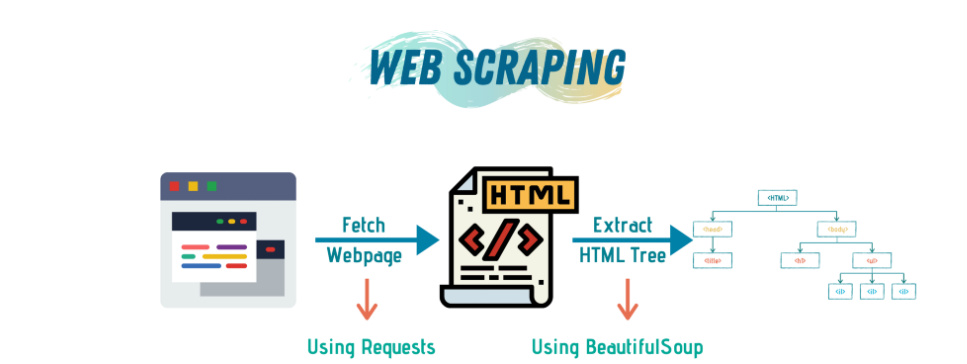

### Basic HTML

Before we get scraping, let’s revise HTML basics quickly. Everything in HTML is defined within tags. The most important tag is <HTML> which means that the text to follow is HTML code.
    
In HTML, each opened tag must be closed. So, at the end of the HTML file, we need a closure tag </HTML>.

Different tags in HTML means different things. Using a combination of tags, a webpage is represented. Any text enclosed between an open and close tag is called inner HTML text.The Tag object allows us to navigate through an HTML document, and extract other tags and text. 

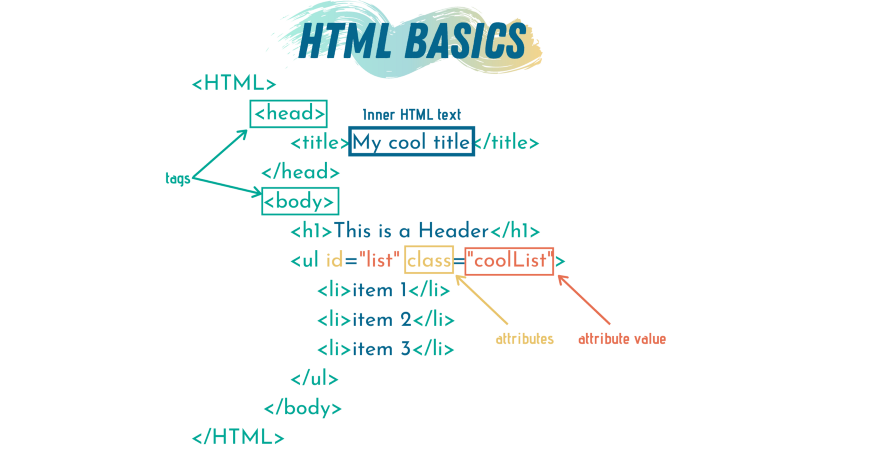

If we have multiple elements with the same tag, we might — actually, always — want to differentiate between them somehow. There are two ways to do that, either through using classes or ids. Ids are unique, which means we can’t have two elements with the same id. Classes, on the other hand, are not. More than one element can have the same class.

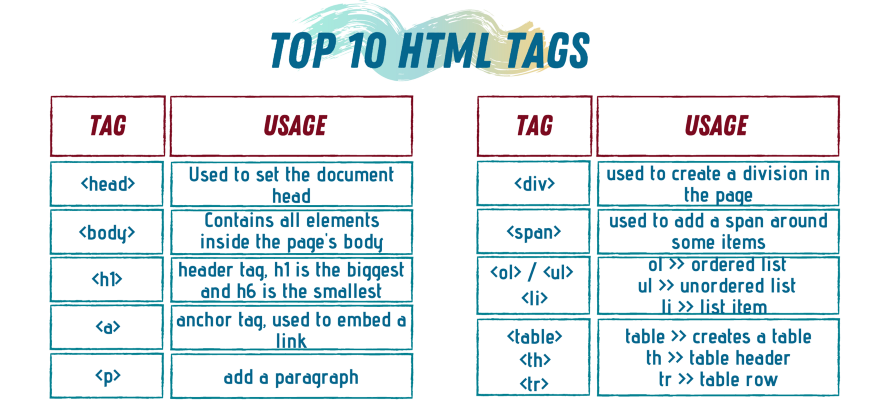

### Basic Scraping

#### The first question to ask before getting started with any python application is ‘Which libraries do I need?’



#### The requests library

The requests library will make a GET request to a web server, which will download the HTML contents of a given web page for us.




In [43]:
import requests
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

After running our request, we get a Response object. This object has a status_code property, which indicates if the page was downloaded successfully

A status_code of 200 means that the page downloaded successfully. We won’t fully dive into status codes here, but a status code starting with a 2 generally indicates success, and a code starting with a 4 or a 5 indicates an error.

In [44]:
# We can print out the HTML content of the page using the content property:

page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


#### Library urllib
urllib is a standard Python library (meaning you don’t have to install anything extra
to run this example) and contains functions for requesting data across the web, han‐
dling cookies, and even changing metadata such as headers and your user agent. 



In [27]:

# it looks at the Python module request (found within the urllib library) and imports only the function urlopen

from urllib.request import urlopen

# urlopen is used to open a remote object across a network and read it.

html = urlopen('http://pythonscraping.com/pages/page1.html')

#  html.read() in order to get the HTML content of the page
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


#### BeautifulSoap

It helps format and organize the messy web by fixing bad HTML and presenting us
with easily traversable Python objects representing XML structures

pip install beautifulsoup4

In [28]:
# Running BeautifulSoup

from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page1.html')

bs = BeautifulSoup(html.read(), 'html.parser')

print(bs.h1)

<h1>An Interesting Title</h1>


#### Parsing a page with BeautifulSoup

As you can see above, we now have downloaded an HTML document.

We can use the BeautifulSoup library to parse this document, and extract the text from the p tag.

We first have to import the library, and create an instance of the BeautifulSoup class to parse our document:

In [45]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [46]:
# We can now print out the HTML content of the page, formatted nicely, using the prettify method on the BeautifulSoup object.

print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


The above tells us that there are two tags at the top level of the page — the initial !DOCTYPE html tag, and the html tag.

As all the tags are nested, we can move through the structure one level at a time. We can first select all the elements at the top level of the page using the *children* property of soup.

In [47]:
list(soup.children)

['html',
 '\n',
 <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

In [48]:
# see what the type of each element in the list is

[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

As we can see, all of the items are BeautifulSoup objects:

The first is a Doctype object, which contains information about the type of the document.

The second is a NavigableString, which represents text found in the HTML document.

The final item is a Tag object, which contains other nested tags.

In [50]:
# We can now select the html tag and its children by taking the third item in the list:

html = list(soup.children)[2]

# Each item in the list returned by the children property is also a BeautifulSoup object, so we can also call the children method on html.

In [51]:
# Now, we can find the children inside the html tag:

list(html.children)

['\n',
 <head>
 <title>A simple example page</title>
 </head>,
 '\n',
 <body>
 <p>Here is some simple content for this page.</p>
 </body>,
 '\n']

As we can see above, there are two tags here, head, and body. 

We want to extract the text inside the p tag, so we’ll dive into the body:

In [52]:
body = list(html.children)[3]

In [54]:
list(body.children)

['\n', <p>Here is some simple content for this page.</p>, '\n']

In [53]:
# Now, we can get the p tag by finding the children of the body tag:

p = list(body.children)[1]

In [55]:
# Once we’ve isolated the tag, we can use the get_text method to extract all of the text inside the tag:

p.get_text()

'Here is some simple content for this page.'

What we did above was useful for figuring out how to navigate a page, but it took a lot of commands to do something fairly simple.

If we want to extract a single tag, we can instead use the find_all method, which will **find all the instances of a tag on a page**.

In [56]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

[<p>Here is some simple content for this page.</p>]

Note that find_all returns a list, so we’ll have to loop through, or use list indexing, it to extract text:

In [57]:
soup.find_all('p')[0].get_text()

'Here is some simple content for this page.'

You should already know how to write a Python script that retrieves an arbitrary
Wikipedia page and produces a list of links on that page:

In [10]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Wikipedia:Protection_policy#semi
#mw-head
#searchInput
/wiki/Kevin_Bacon_(disambiguation)
/wiki/File:Kevin_Bacon_SDCC_2014.jpg
/wiki/Philadelphia,_Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
#cite_note-1
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Wikipedia:Citation_needed
http://baconbros.com/
#cite_note-2
#cite_note-actor-3
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/X-Men:_First_Class
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/w

#### Before you download


Be careful: sometimes downloading data is illegal. The rules and legal situation might depend on the country where the data is hosted and into which country it is downloaded. Often, websites have a page called “terms of use” or something similar that might be worth taking a look at.

### An example

Steps involved in web scraping:

+ Send an HTTP request to the URL of the webpage you want to access. The server responds to the request by returning the HTML content of the webpage. For this task, we will use a third-party HTTP library for python-requests.

</br>

+ Once we have accessed the HTML content, we are left with the task of parsing the data. Since most of the HTML data is nested, we cannot extract data simply through string processing. One needs a parser which can create a nested/tree structure of the HTML data. There are many HTML parser libraries available but the most advanced one is html5lib.

</br>

+ Now, all we need to do is navigating and searching the parse tree that we created, i.e. tree traversal. For this task, we will be using another third-party python library, Beautiful Soup. It is a Python library for pulling data out of HTML and XML files.

In [14]:
# Store url
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

In [15]:
# Import `requests`
import requests

# Make the request and check object type
r = requests.get(url)
type(r)

requests.models.Response

a Response object has an attribute text that allows you to get the HTML from it! Let's do this and print the HTML to check it out:

In [16]:
# Extract HTML from Response object and print
html = r.text
#print(html)

In [18]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup


# Create a BeautifulSoup object from the HTML
'''
Parsing this html using a method called lxml, create a soup object. 
You can simply "h1" or "p" to call the heading 1 and paragraph tag from soup.

'''
soup = BeautifulSoup(html, "lxml")
type(soup)

bs4.BeautifulSoup

From these soup objects, you can extract all types of interesting information about the website you're scraping, such as title:

In [19]:
# Get soup title
soup.title

<title>The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville</title>

What you want to do is to extract the text from the soup and there's a super helpful .get_text() method precisely for this.

In [21]:
# Get the text out of the soup and print it
text = soup.get_text()

print(text)





The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville



The Project Gutenberg eBook of Moby-Dick; or The Whale, by Herman Melville

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online
at www.gutenberg.org. If you
are not located in the United States, you will have to check the laws of the
country where you are located before using this eBook.

Title: Moby-Dick; or The Whale
Author: Herman Melville
Release Date: June, 2001 [eBook #2701]
[Most recently updated: August 18, 2021]
Language: English
Character set encoding: UTF-8
Produced by: Daniel Lazarus, Jonesey, and David Widger
*** START OF THE PROJECT GUTENBERG EBOOK MOBY-DICK; OR THE WHALE ***

      MOBY-DICK;or, THE WHALE.
    




      By Herman Melville
    

 



 



CONTENTS


### Text-Scraping-Document-Clustering-Topic-modeling (an example)

#### Part1 Scrape Web Page

# 3 Text Classification 

In order to make the best use of these tools, we must also use techniques to categorize, filter, and prioritize the more important information from the less relevant pieces, and text classification is one such technique that can help us achieve this.

Before we define text classification, we need to understand the scope of textual data and 
what we mean by classification. 

The textual data involved here can be anything ranging 
from a phrase, a sentence, or a complete document with paragraphs of text that can 
be obtained from corpora, blogs, anywhere from the web, or even an enterprise data 
warehouse. 

**Text classification** is also often called document classification just to cover 
all forms of textual content under the term “document”. While the term “document”
can be defined as some form of concrete representation of thoughts or events, which 
could be in the form of writing, recorded speech, drawings, or presentations, we use the 
term “document” to represent textual data like sentences or paragraphs belonging to the 
English language (feel free to extend this to other languages as long as you are able to 
parse and process that language!).

#### Text or document classification is defined as the process of assigning text documents into one or more classes or categories, assuming that we have a predefined set of classes. 

A text 
classification system can successfully classify each document to its correct class(es) 
based on inherent properties of the document.

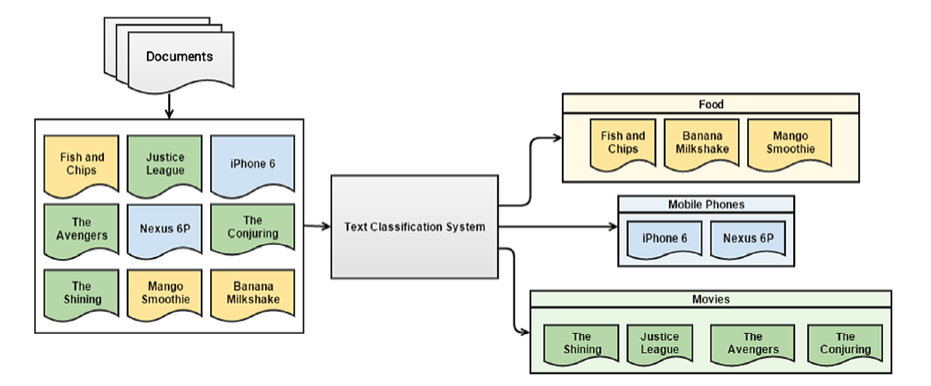

To make the process more efficient 
and faster, we can automate the task of text classification, which brings us to automated 
text classification. 

To automate text classification, we use several machine learning 
techniques and concepts. 

They are as follows:

• Supervised machine learning.Supervised learning refers to specific machine learning techniques or algorithms 
that are trained on prelabeled data samples, known as training data, and corresponding 
training labels/classes. 

• Unsupervised machine learning. Unsupervised learning refers to specific machine learning techniques or algorithms 
that do not require any prelabeled training data samples to build a model. The focus 
is more on pattern mining and finding latent substructures in the data rather than 
predictive analytic’

### Formal Definition

More formally, text classiﬁcation is an analytical process that takes any text document as input and assigns it a classiﬁcation from a predetermined set of class labels.

In other words, text classification learns to make classifications based on past observations.

By using pre-labeled examples as training data, text classification algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). 

### Text Classification Blueprint

The first step towards training a machine learning NLP classifier is **feature extraction**: a method is used to transform each text into a numerical representation in the form of a vector.

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model

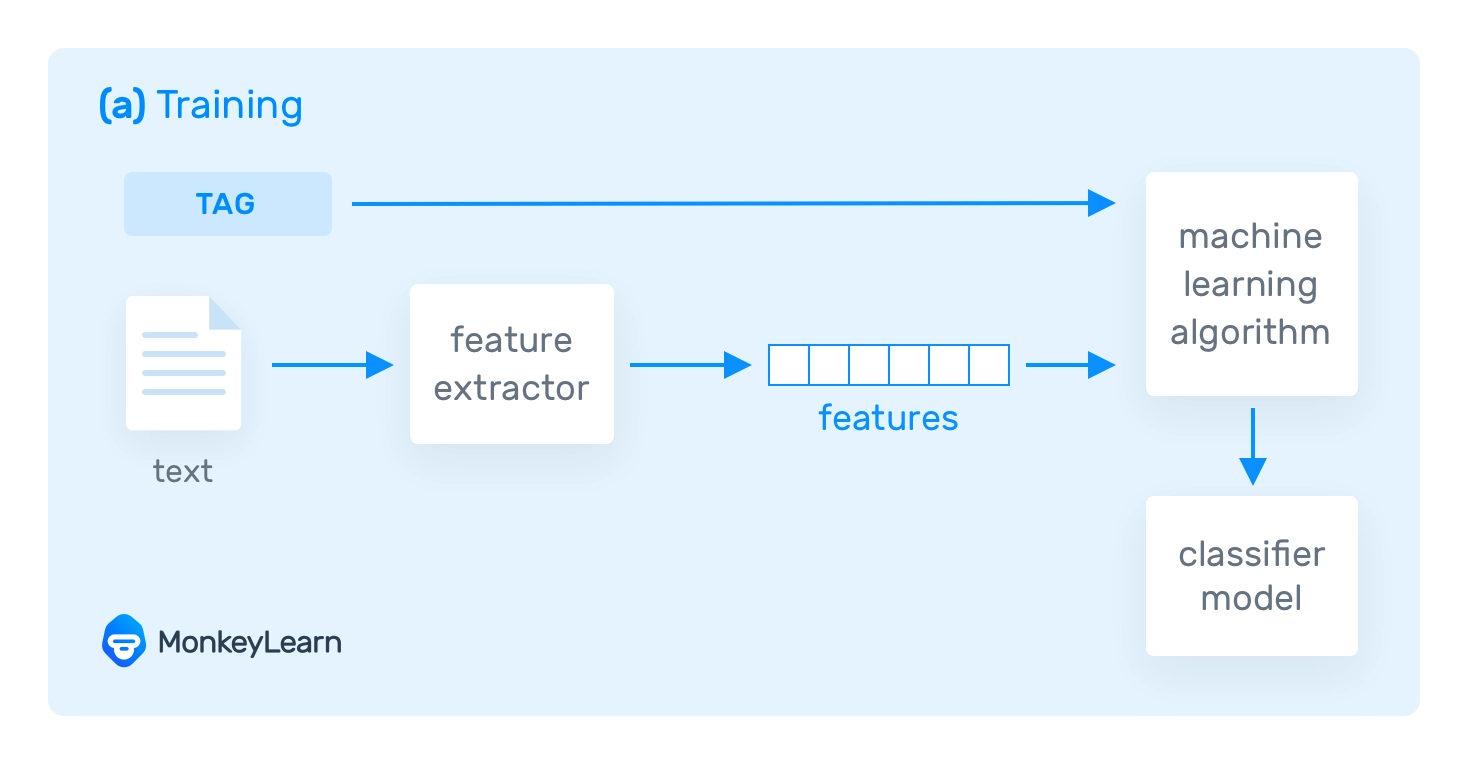

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

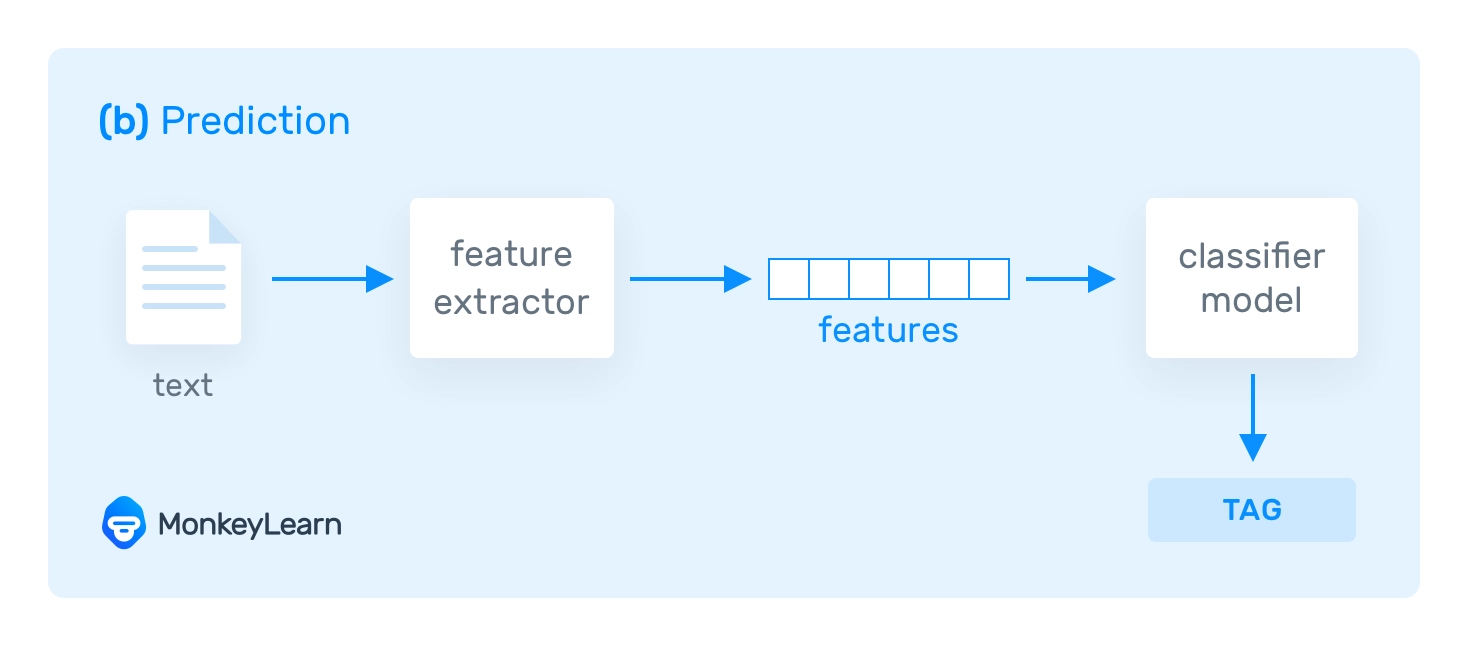

### Applications'

• Assigning	subject	categories,	topics,	or	genres

• Spam	detection

• Authorship	identification

• Age/gender	identification

• Language	Identification

• Sentiment	analysis

• ...



### Text Classification Task Variants

There are several variants of text classification tasks, based on the number of classes to 
predict and the nature of predictions. They are as follows:

• Binary classification. when the total number of distinct classes or 
categories is two and any prediction can contain either one of those classes

• Multi-class classification.  a problem 
where the total number of classes is more than two and each prediction gives one class 
or category, which can belong to any of those classes

• Multi-label classification. refers to problems where each prediction can yield more than one 
outcome/predicted class for any data point


### Machine Learning Text Classification Algorithms

Classification models are supervised machine learning algorithms that are used to 
classify, categorize, or label data points based on what it has observed in the past. 

Each 
classification algorithm is a supervised learning algorithm so it requires training data. 

Typically, there are various classification algorithms but we will not be venturing into 
each algorithm in detail since the scope of this chapter is related to text classification and 
this is not a book only focusing on machine learning. However, we will touch upon a few 
algorithms, which we use shortly when building our classification models.


• Naïve Bayes

• Logistic regression

• Support vector machines

• Random forest

• Gradient boosting machine

There are also several other classification algorithms; however, these are some of 
the most common and popular algorithms for text data. 

### -- Naive Bayes 

The Naive Bayes family of statistical algorithms are some of the most used algorithms in text classification and text analysis, overall.

Why the name? “Bayes” is named from the famous Bayes’ Theorem in probability, and “Naive” is because the assumptions of this algorithm are very simple and most of the time not true.

#### Assumptions:

1 The order of the words in document X makes no difference but repetitions of words do.

2 Words appear independently of each other, given the document class.

One of the members of that family is **Multinomial Naive Bayes (MNB)** with a huge advantage, that you can get really good results even when your dataset isn’t very large (~ a couple of thousand tagged samples) and computational resources are scarce.

#### Formula

Bayes’s theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

The formula for Bayes theorem is

P(A|B)=P(B|A)P(A)/ P(B)

A, B → Events, 

P(A/B) → probability of A when B is true,**A is class variable and B is a dependent feature vector with dimension d**, which means the probability of observing the class A given the sample B with b dimensions

P(B/A) → probability of B when A is true, often stands for a product of the probability result on each term inside the document (B) that belongs to the class (A)

P(A), P(B) → Independent probability of A and B, P(A) could refer to the prior probability of the class by calculating the proportion of the number of a class by the total number of documents; P(B) often not considered in calculation





#### A Simple Example

Let us consider sentence classification to classify a sentence to either ‘question’ or ‘statement’. In this case, there are two classes (“question” and “statement”). With the training set, we can train a Naive Bayes classifier which we can use to automatically categorize a new sentence.

Our training set will consist of four questions and statements.

In [22]:
import pandas as pd

columns = ['sent', 'class']
rows = []

rows = [['This is my book', 'stmt'], 
        ['They are novels', 'stmt'],
        ['have you read this book', 'question'],
        ['who is the author', 'question'],
        ['what are the characters', 'question'],
        ['This is how I bought the book', 'stmt'],
        ['I like fictions', 'stmt'],
        ['what is your favorite book', 'question']]

training_data = pd.DataFrame(rows, columns=columns)
training_data

,sent,class
0,This is my book,stmt
1,They are novels,stmt
2,have you read this book,question
3,who is the author,question
4,what are the characters,question
5,This is how I bought the book,stmt
6,I like fictions,stmt
7,what is your favorite book,question


We need to find out if a new sentence, say, ‘what is the price of the book’ is a question or not.
We will use Bayes Naive Theorem to solve this.

We need to find out what is the Probability of class ‘Question’ given the new sentence and the Probability of class ‘Statement’ given the new sentence

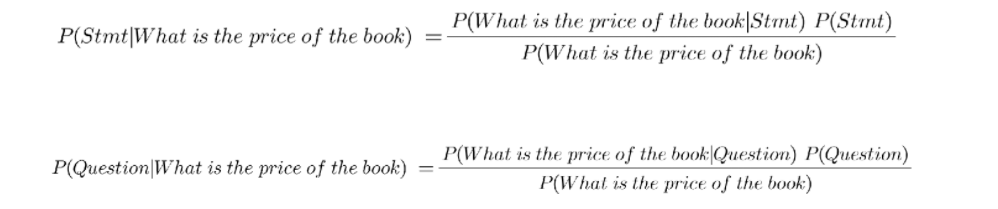

Since the denominator is same for both the equations, we can ignore the denominator and have to find out the values for the numerator.

Since the denominator is same for both the equations, we can ignore the denominator and have to find out the values for the numerator.

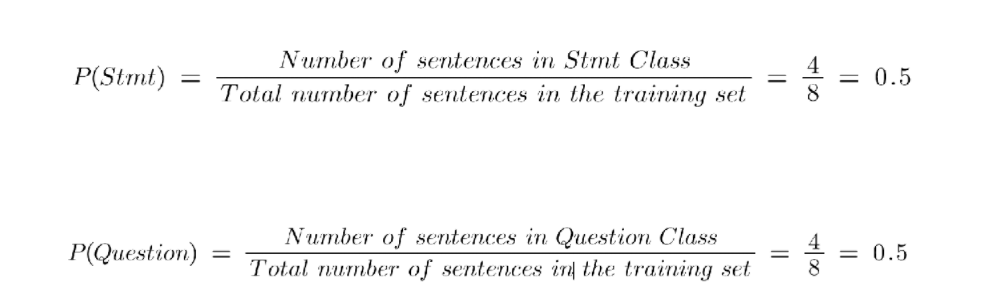

let us split the sentence to words and assume that every word in a sentence is independent of the other ones. That is, we’re no longer looking at entire sentence, but rather at individual words.

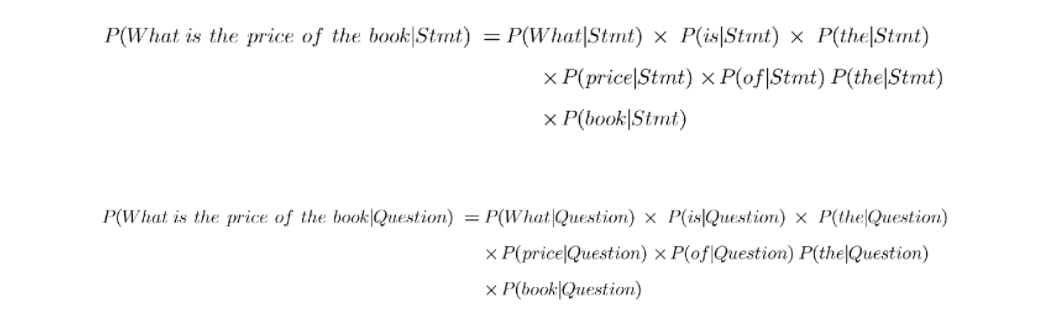

The next step is just to calculate every probability in the above equations.

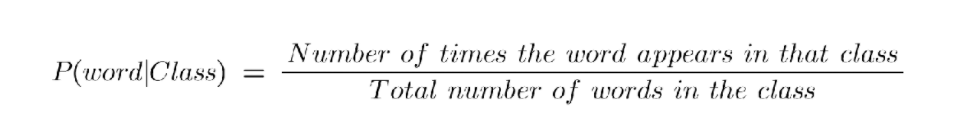

To find the total number of times a word appears in a class, we can use CountVectorizer from sklearn.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

stmt_docs = [row['sent'] for index,row in training_data.iterrows() if row['class'] == 'stmt']

vec_s = CountVectorizer()
X_s = vec_s.fit_transform(stmt_docs)
tdm_s = pd.DataFrame(X_s.toarray(), columns=vec_s.get_feature_names())

tdm_s # TDM for Statement Class

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,are,book,bought,fictions,how,is,like,my,novels,the,they,this
0,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0
2,0,1,1,0,1,1,0,0,0,1,0,1
3,0,0,0,1,0,0,1,0,0,0,0,0


Next, let’s compute the Term-Document Matrix (TDM) for ‘question’ class.

In [24]:
q_docs = [row['sent'] for index,row in training_data.iterrows() if row['class'] == 'question']

vec_q = CountVectorizer()
X_q = vec_q.fit_transform(q_docs)
tdm_q = pd.DataFrame(X_q.toarray(), columns=vec_q.get_feature_names())

tdm_q # TDM for Question Class

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,are,author,book,characters,favorite,have,is,read,the,this,what,who,you,your
0,0,0,1,0,0,1,0,1,0,1,0,0,1,0
1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,1,0,1,0,1,0,0,0,1,0,0,1


Next , We need to calculate the total number of times each word appeared in a class. For Eg, from the above matrix, the word ‘book’ had appeared 2 times in ‘Question’ Class.

In [25]:
word_list_s = vec_s.get_feature_names();    
count_list_s = X_s.toarray().sum(axis=0) 
freq_s = dict(zip(word_list_s,count_list_s))
freq_s

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'are': 1,
 'book': 2,
 'bought': 1,
 'fictions': 1,
 'how': 1,
 'is': 2,
 'like': 1,
 'my': 1,
 'novels': 1,
 'the': 1,
 'they': 1,
 'this': 2}

In [26]:
#Similarly, Frequency of words for Question Class:


word_list_q = vec_q.get_feature_names();    
count_list_q = X_q.toarray().sum(axis=0) 
freq_q = dict(zip(word_list_q,count_list_q))
freq_q

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'are': 1,
 'author': 1,
 'book': 2,
 'characters': 1,
 'favorite': 1,
 'have': 1,
 'is': 2,
 'read': 1,
 'the': 2,
 'this': 1,
 'what': 2,
 'who': 1,
 'you': 1,
 'your': 1}

Probabilities of words in Statement Class:

In [27]:
prob_s = []
for word,count in zip(word_list_s, count_list_s):
    prob_s.append(count/len(word_list_s))
dict (zip(word_list_s, prob_s))

{'are': 0.08333333333333333,
 'book': 0.16666666666666666,
 'bought': 0.08333333333333333,
 'fictions': 0.08333333333333333,
 'how': 0.08333333333333333,
 'is': 0.16666666666666666,
 'like': 0.08333333333333333,
 'my': 0.08333333333333333,
 'novels': 0.08333333333333333,
 'the': 0.08333333333333333,
 'they': 0.08333333333333333,
 'this': 0.16666666666666666}

### Example: Multinomial Naive Bayes

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. 

here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

In [28]:
# Let's download the data and take a look at the target names:

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [29]:
# For simplicity here, we will select just a few of these categories, and download the training and testing set:

categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [30]:
# Here is a representative entry from the data:

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer (discussed in Feature Engineering), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [32]:
# With this pipeline, we can apply the model to the training data, and predict labels for the test data:

model.fit(train.data, train.target)

labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data:

Matplotlib is building the font cache; this may take a moment.


NameError: name 'plt' is not defined

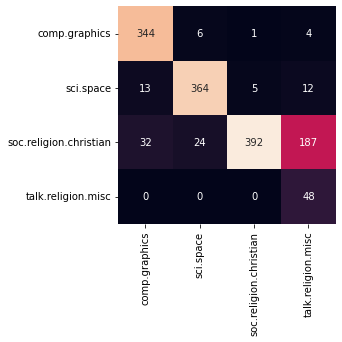

In [35]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Confusion matrix

A performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values

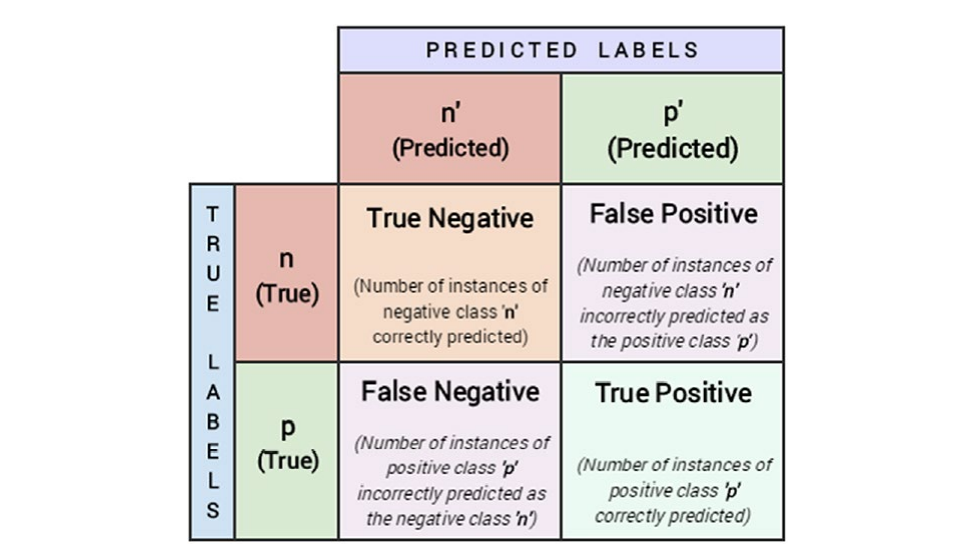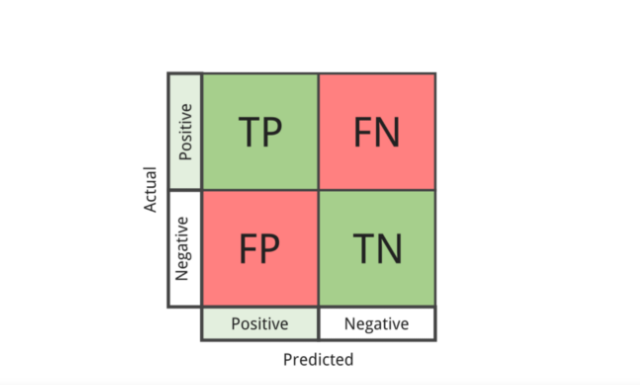

true positive (TP)
A test result that correctly indicates the presence of a condition or characteristic

true negative (TN)
A test result that correctly indicates the absence of a condition or characteristic

false positive (FP)
A test result which wrongly indicates that a particular condition or attribute is present

false negative (FN)
A test result which wrongly indicates that a particular condition or attribute is absent

In [ ]:
'''

A confusion matrix is created by comparing the predicted class label of a data point 
with its actual class label. This comparison is repeated for the whole dataset and the 
results of this comparison are compiled in a matrix or tabular format. This resultant 
matrix is our confusion matrix. B

'''
from sklearn import linear_model

# train and build the model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

# predict on test data and view confusion matrix

import model_evaluation_utils as meu
y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, 
classes=[0, 1])

### -- Logistic regression

It is also known as the logit or logistic model since it uses the 
logistic (popularly also known as sigmoid) mathematical function to estimate the 
parameter values. 

Differently from Naive Bayes, this classifier is a discriminative model, i.e., we are interested in P (y= k|x) and not in the joint distribution p(x,y).

#### Application

Logistic Regression can be used for various classification problems such as spam detection. Diabetes prediction, if a given customer will purchase a particular product or will they churn another competitor, whether the user will click on a given advertisement link or not, and many more examples are in the bucket.


#### Some assumptions

The dependent variable should be binary.

The dataset size should be large enough.

### --- Support Vector Machines

In machine learning, support vector machines, known popularly as SVMs, are 
supervised learning algorithms. They are used for classification, regression, novelty 
and anomaly, and outlier detection.

Support vector machines is an algorithm that determines the best decision boundary between vectors that belong to a given group (or category) and vectors that do not belong to it.

When SVM determines the decision boundary we mentioned above, SVM decides where to draw the best “line” (or the best hyperplane) that divides the space into two subspaces: one for the vectors which belong to the given category and one for the vectors which do not belong to it.

So, provided we can find vector representations which encode as much information from our texts as possible, we will be able to apply the SVM algorithm to text classification problems and obtain very good results.

Say, for example, the blue circles in the graph below are representations of training texts which talk about the Pricing of a SaaS Product and the red triangles are representations of training texts which do not talk about that. What would the decision boundary for the Pricing category look like?

The best decision boundary would look like this:
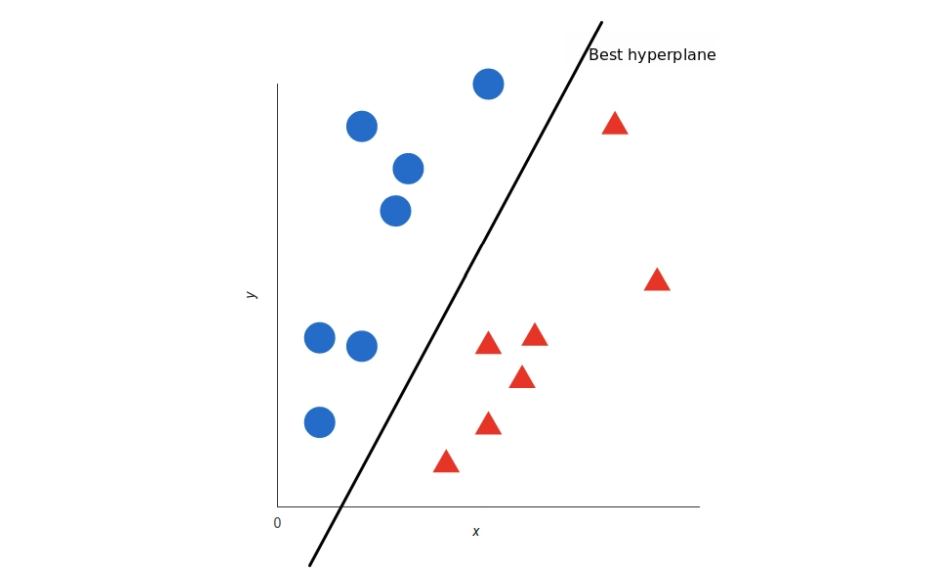

### An example

#### Step 1: Loading and splitting our dataset

with open("tickets.txt") as f:
    tickets = f.read().strip().split("\n")

with open("labels_4.txt") as f:
    labels = f.read().strip().split("\n")
    

**We want to split these into training and test datasets, using the former to train our classifier and the latter to evaluate the results.**

This can be done using the train_test_split helper that we imported above by adding the following code to our file:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tickets, labels, test_size=0.1, random_state=1337)

#### Step 2 Training Support Vector Machines (SVMs)

The next steps are to vectorize our dataset, train the classifier, and check the predicted results against our actual results. This can be done by adding the following code:



In [ ]:
# created a vectorizer and a classifier

vectorizer = CountVectorizer()
svm = LinearSVC()

# Then we can fit_transform on X_train. 
# We used the same vectorizer to transform our test set into vectors, train our classifier, and predict results on our test set. 

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
_ = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

Finally, we printed a report on how well our classifier did.
print(classification_report(y_test, y_pred))

There is some randomness involved in the training process, but you should see a report that's similar to this one:

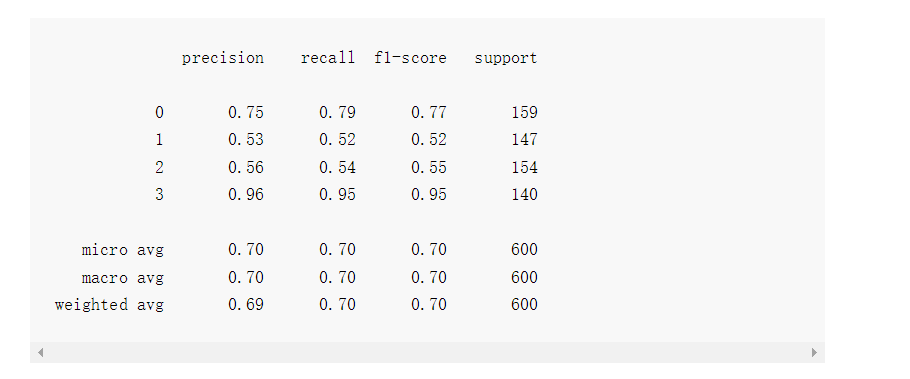

### - Random Forest

Decision trees are a family of supervised machine learning algorithms that can represent 
and interpret sets of rules automatically from the underlying data. They use metrics like 
information gain and gini-index to build the tree. However, a major drawback of decision 
trees is that since they are non-parametric, the more data there is, greater the depth of 
the tree. We can end up with really huge and deep trees that are prone to overfitting. 

The 
model might work really well on training data, but instead of learning, it just memorizes 
all the training samples and builds very specific rules to them. Hence, it performs really 
poorly on the test data. Random forests try to tackle this problem.

In [38]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

Following represents the corpus of text data used. The sample data I used is meant to classify text about apple and oranges. This could be used for emails for classifying spam.

In [43]:
corpus = ['The apple is on sale','The oranges in on sale','The apple and is present','The orange and is present']

In [44]:
# Case for Apple as group 1, and case for orange as group 2.

Y = np.array([1,2,1,2])

In [45]:
# Creating bag-of-words using CountVectorizer

vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus).toarray()

In [47]:
# Lastly, classify the text using random forest tree classifier.

clf = RandomForestClassifier()
clf.fit(X, Y)
clf.predict(vectorizer.transform(['apple is present']).toarray())

array([1])

### Evaluating Classification Models

Performance of classification models is usually based on how well they are predicting 
outcomes for new data points. Usually this performance is measured against a test or 
holdout dataset, which consists of data points that were not used to influence or train the 
classifier in any way. 

There are several metrics to determine a model’s prediction 
performance. We mainly focus on the following metrics.

• Accuracy

• Precision

• Recall

• F1-score

#### Accuracy 

It is defined 
as the overall proportion of correct predictions of the model. 

Accuracy is normally used when our classes are almost balanced and correct 
predictions of those classes are equally important. 

#### Precision,

also known as positive predictive value, is another metric that can be 
derived from the confusion matrix. It is defined as the number of predictions made that 
are actually correct or relevant out of all the predictions based on the positive class.

A model with high precision will identify a higher fraction of positive classes as 
compared to a model with a lower precision.

#### Recall

also known as sensitivity, is a measure of a model to identify the percentage 
of relevant data points. 

It is defined as the number of instances of the positive class that 
were correctly predicted. This is also known as hit rate, coverage, or sensitivity. 

#### F1-score 

is the harmonic mean of precision and recall and helps us 
optimize a classifier for balanced precision and recall performance.

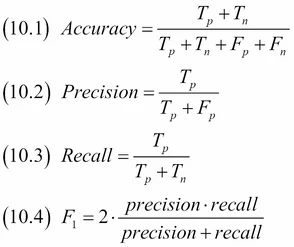

## An example

In this example, we will use blueprints to classify bugs and issues raised during the development of the Java Development Tools (JDT) open source project. The JDT project is a part of the Eclipse foundation, which develops the Eclipse integrated development environment (IDE). JDT provides all the functionality needed by software developers to write code using Java in the Eclipse IDE. Users of JDT report bugs and track issues with the tool Bugzilla, a popular open source bug tracking software. Bugzilla is also used by other open source projects like Firefox and the Eclipse Platform. A dataset containing the bugs for all these projects can be found on GitHub, and we will use the bugs dataset of the JDT project.

The following section loads a CSV file that contains the JDT bugs dataset. This dataset contains 45,296 bugs and some of the available characteristics for each bug. We print a list of all the features reported for a bug and look at some of them in more detail to see what the bug reports look like:

In [49]:
df = pd.read_csv('C:/Users/kimuj/Documents/Python Scripts/Training/data/eclipse_jdt.csv')
print (df.columns)
df[['Issue_id','Priority','Component','Title','Description']].sample(2)

Index(['Issue_id', 'Priority', 'Component', 'Duplicated_issue', 'Title',
       'Description', 'Status', 'Resolution', 'Version', 'Created_time',
       'Resolved_time'],
      dtype='object')


,Issue_id,Priority,Component,Title,Description
10579,29578,P3,Core,Issues with migrating shared data,As we move to 2.1 there will be people using b...
14535,41734,P3,UI,ASTRewrite: Inconsistent handling of comments ...,ASTRewrite rewriter;; rewriter.markAsRemoved(m...


In [50]:
# Step 1: Data Preparation

'''
Before proceeding to build the text classification model, we must perform some necessary preprocessing steps 
to clean the data and format it in a manner that is suitable for the application of machine learning algorithms.

'''

# Since our objective is to identify the priority of a bug report given its title and description, we select only those columns that are relevant for the text classification model. 

df = df[['Title','Description','Priority']]
df = df.dropna()
df['text'] = df['Title'] + ' ' + df['Description']
df = df.drop(columns=['Title','Description'])
df.columns

Index(['Priority', 'text'], dtype='object')

### Step 2

We use the sklearn.model_selection.train_test_split function to implement the train-test split, and we provide 0.2 as the argument for the test_size (denoting 20% of our data as our test split).

In addition, we must also specify our independent and target variables, and the method returns to us a list of four elements; the first two elements are the independent variables split into train and test splits, and the next two elements are the target variable splits. 

One important argument of the function to note is the random_state. This number influences how the rows are sampled and therefore which set of observations goes to the train split and which set of observations goes to the test split. 

In [52]:
# Step 2: Train-Test Split

X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36202
Size of Test Data  9051


### Step 3: Training the Machine Learning Model

Our next step in creating the text classification blueprint is to train a supervised machine learning model using a suitable algorithm. 

Before proceeding to run the SVM model, we must prepare our text data in a suitable format that can be used by the algorithm. This means that we must find a way to represent text data in a numeric format. The simplest way is to count the number of times each word occurs in a bug report and combine the counts of all words to create a numeric representation for each observation. 

In [53]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

The TF-IDF vectorization performed in the previous step results in a sparse matrix. The SVM algorithm is preferred when working with text data because it is more suited to work with sparse data compared to other algorithms like Random Forest. They are also better suited to work with input features that are purely numeric (as in our case), while other algorithms are capable of handling a mixture of numeric and categorical input features. 

For now we start by specifying some default values and then call the fit method, making sure to use the vectorized independent variables that we created in the previous step:

In [55]:
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

LinearSVC(random_state=0, tol=1e-05)

On executing the preceding code, we fit a model using the training data, and the result shows us the various parameters of the model that was generated. Most of these are the default values since we specified only the random_state and tolerance.

### Step 4: Model Evaluation

We now have a model that can be used to predict the target variable for all the observations in the test split. For these observations, we also know the real target variable, and therefore we can calculate the performance of our model. There are many metrics that can be used to quantify the accuracy of our model, and we will introduce three of them in this section.

In [57]:
from sklearn.metrics import accuracy_score

X_test_tf = tfidf.transform(X_test)

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

Accuracy Score -  0.8744890067395867


As you can see, we have achieved a high accuracy score of 87.5%, which indicates that we have a good model that is able to predict the priority of bugs accurately.

In [58]:
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)

array([[  24,    7,  192,    1,    0],
       [   6,   12,  589,    6,    0],
       [  23,   46, 7848,   18,    0],
       [   0,    3,  195,   31,    0],
       [   1,    0,   48,    1,    0]], dtype=int64)

NameError: name 'plt_confusion_matrix' is not defined